<a href="https://colab.research.google.com/github/KU-BIG/KUBIG_2026_SPRING/blob/main/2026_1_ML_week2_%EC%9C%A4%EC%A7%80%EC%9B%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 2. Supervised Learning**

2주차 과제는 지도학습의 회귀, 분류 모델을 학습-평가하는 과정을 간소하게 재현한 코드입니다.

1. 적힌 코드를 따라가며, 배운 내용과 어떻게 연관되는지 등을 생각하거나 찾아본 후, 주석으로 달아주시면 좋을 것 같습니다.
2. 더불어 생각해볼 만한 질문들을 중간에 달아두었으니, 이에 대한 고민과 답변을 작성해주시면 됩니다.

# **1. 회귀 - with diabetes dataset**

In [2]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns
import matplotlib.pyplot as plt

## 1. 데이터 로드 및 탐색

In [4]:
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
feature_names = diabetes.feature_names

In [5]:
# 데이터 크기와 피처(특성) 정보 출력
print(f"Dataset Shape: {X.shape}")  # ( , )
print(f"Feature Names: {diabetes.feature_names}") #이때 s1,s2,,,는 혈액 검사 결과 생화학 지표들
print(f"Target (y) Sample: {y[:5]}")  # 타겟 값 일부 확인

Dataset Shape: (442, 10)
Feature Names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Target (y) Sample: [151.  75. 141. 206. 135.]


In [6]:
# 데이터프레임으로 변환하여 탐색
# 데이터프레임 구조로 변환해야 여러 탐색이 용이해짐
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [ ]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


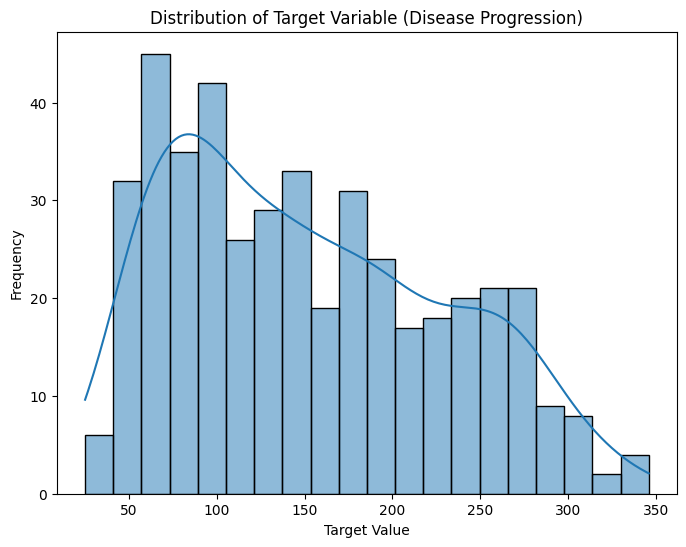

In [ ]:
# 히스토그램으로 타겟 값 분포 확인
# right-skewed 분포
plt.figure(figsize=(8, 6))
sns.histplot(df['target'], bins=20, kde=True)
plt.title("Distribution of Target Variable (Disease Progression)")
plt.xlabel("Target Value")
plt.ylabel("Frequency")
plt.show()

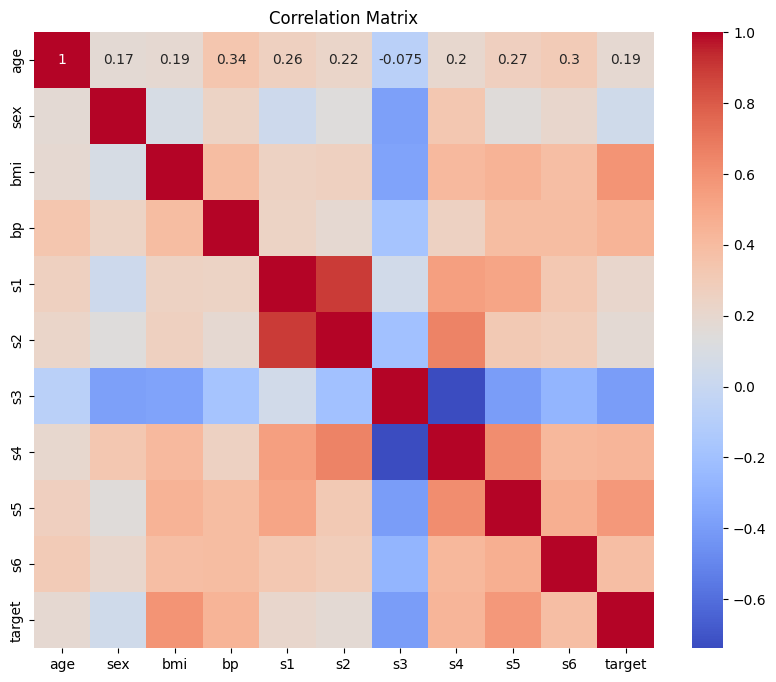

In [ ]:
# 상관 행렬 및 히트맵 시각화
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

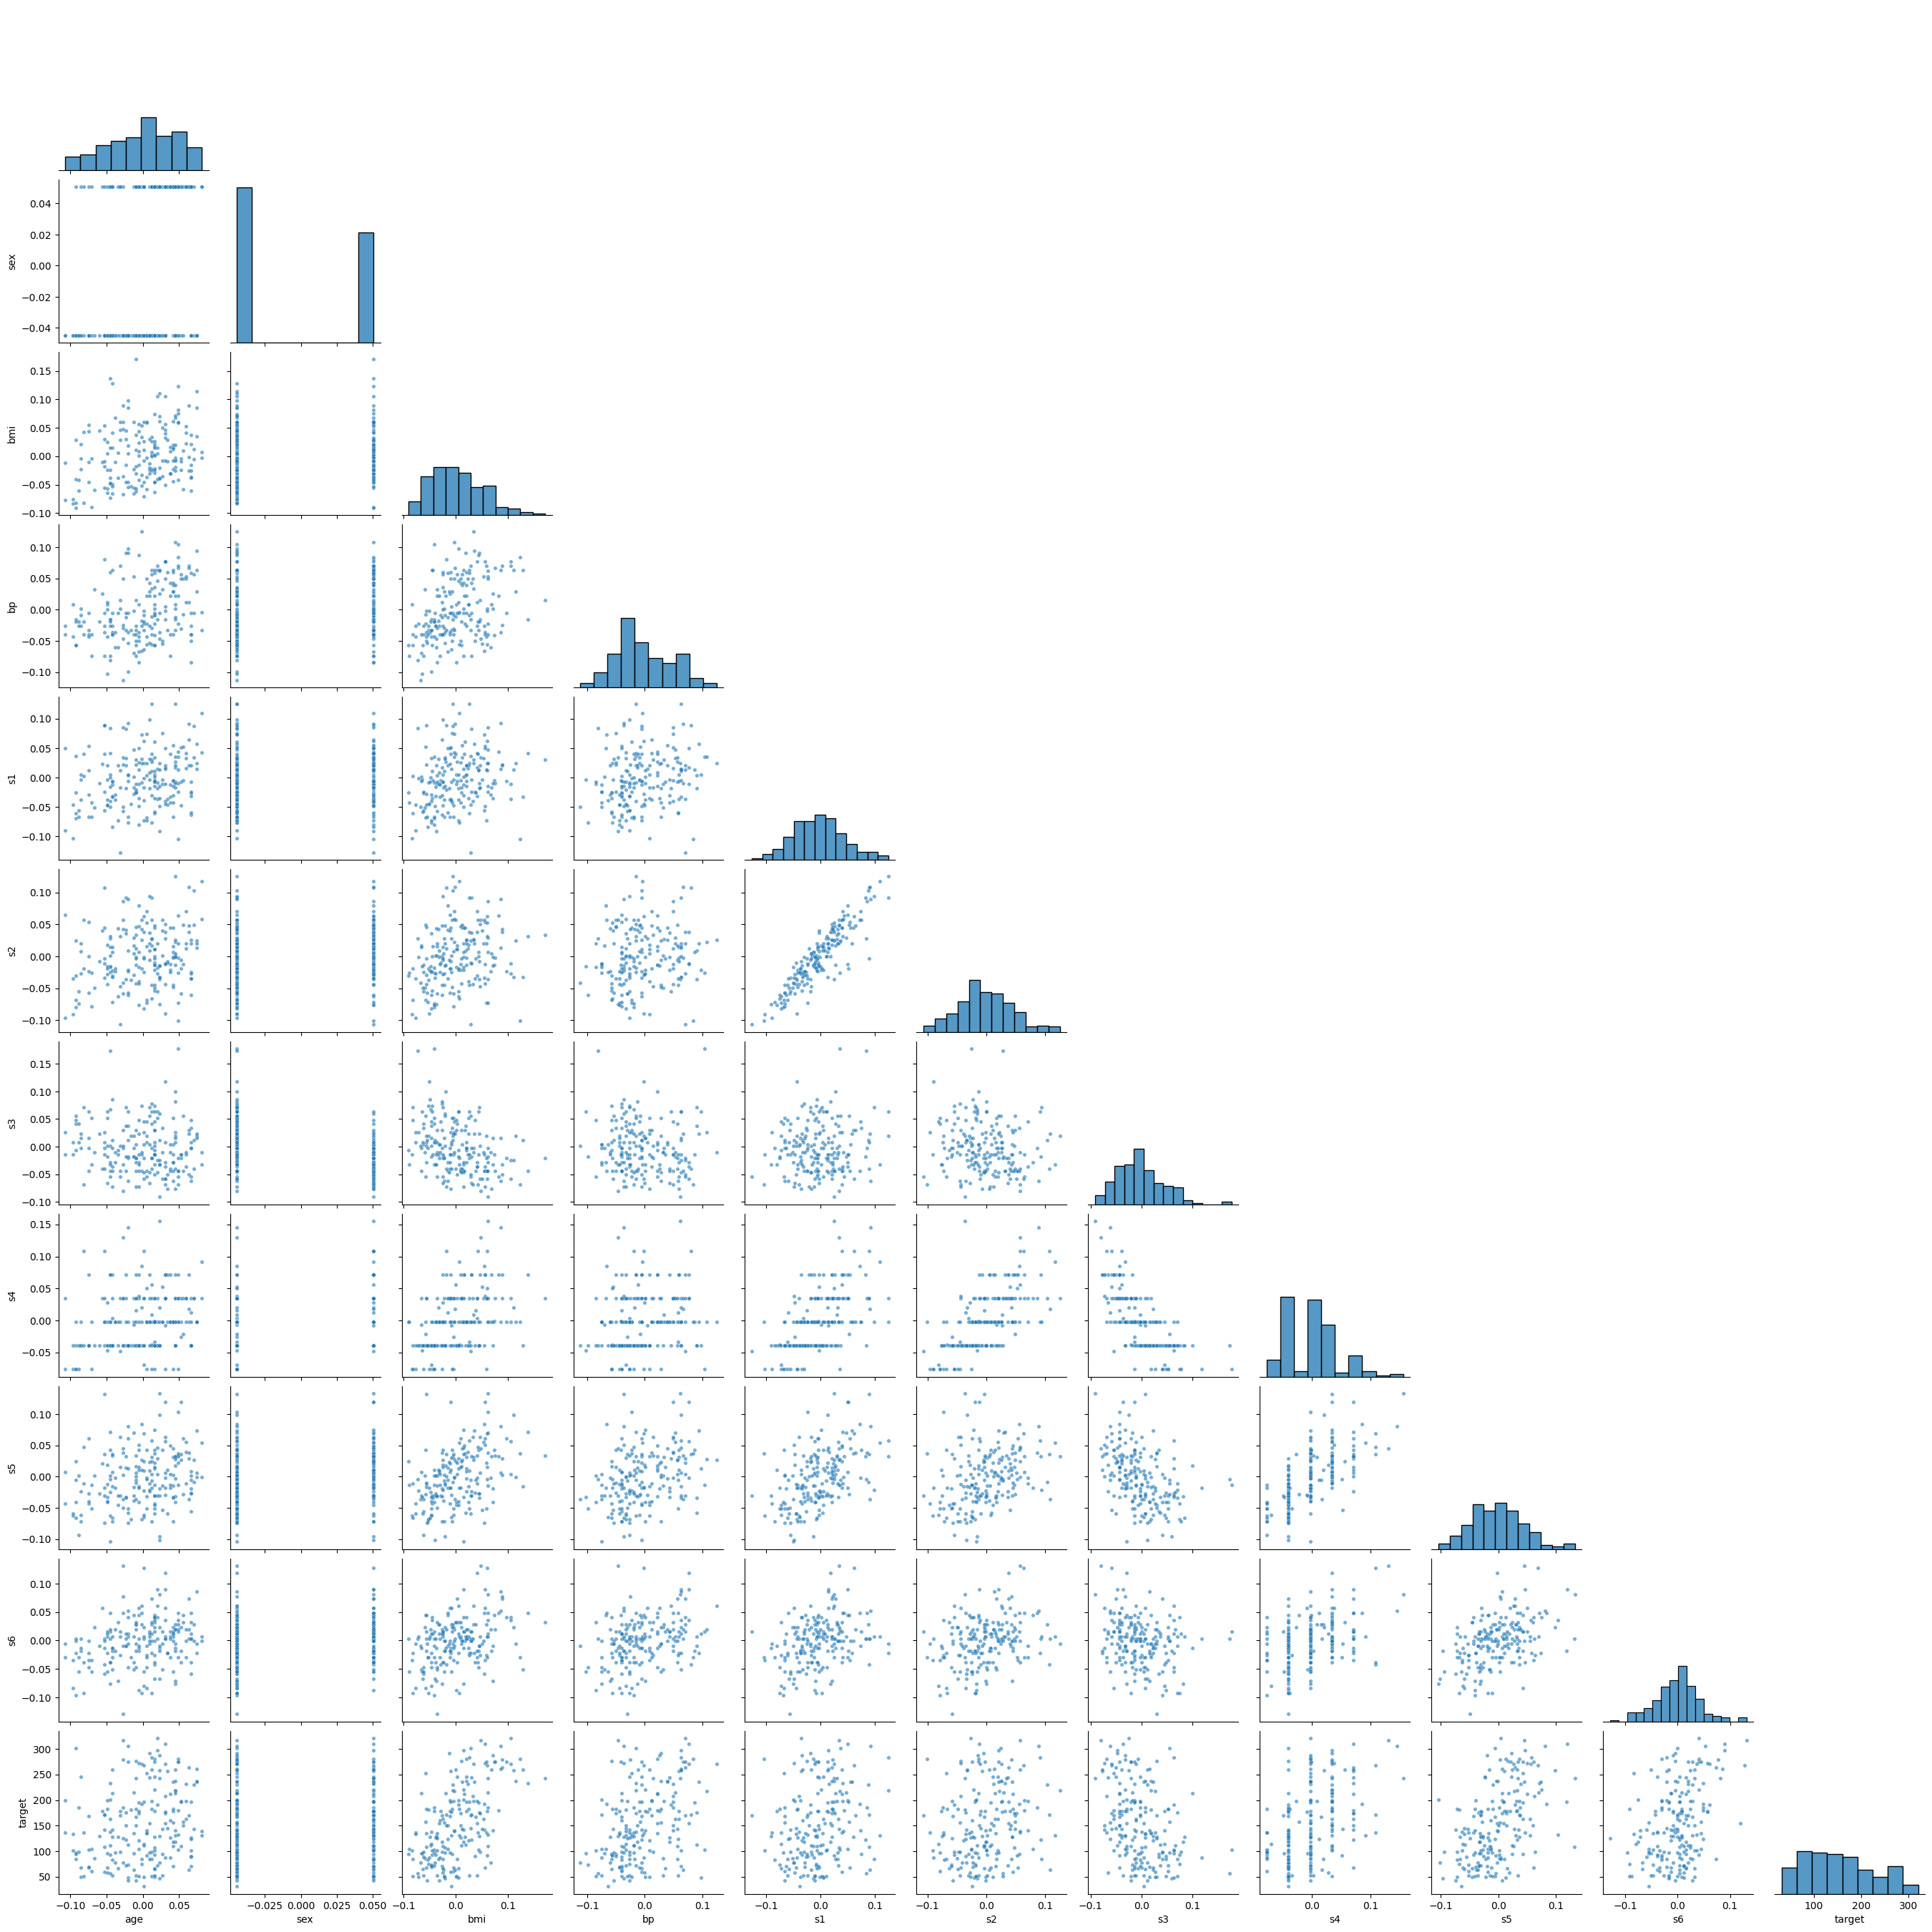

In [6]:
# Q1-1: 어떤 피처(특성)가 가장 중요한지, 직접 데이터를 분석해보세요.
# (pairplot을 통한 분석)target과 다른 변수의 산점도를 비교하였을 때 target은 bmi, s5 와 가장 뚜렷한 관계 있음.
# s1와 s2산점도 거의 완벽한 직선이므로 다중공선성 우려 있음.

sns.pairplot(
    df.sample(200, random_state=0), #정보량이 많기 때문에 샘플링하여
    corner=True, #pairplot은 대각선 기준 정보 중복되므로
    plot_kws={"s": 15, "alpha": 0.6}
)
plt.show()


# Q1-2: 어떤 피처가 'target'과 가장 높은 상관관계를 가지나요?
#bmi, s3, s5 가 heatmap 상에서 상대적으로 높은 상관관계를 보임.


## 2. 데이터 전처리: 데이터 분할 및 스케일링


In [7]:
# 훈련 데이터와 테스트 데이터 분할
# 현재는 학습 데이터 80%, 테스트 데이터 20%로 설정한 것.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Q2: 데이터 분할 비율을 70:30 또는 90:10으로 변경하면 결과는 어떻게 달라질까요?
# 70:30 -> 훈련 성능 약간 감소, 그러나 테스트 성능 평가는 더 안정적(분산 안정적).(데이터가 충분히 클 떄는 합리적인 선택임)
# 90:10 -> 훈련 성능 및 일반화 성능 향상 그러나 평과 결과의 분산이 커짐.

In [13]:
# 스케일링(표준화)
# fit은 오직 train data에서만. test에는 transform 만.
# test data에 대해 fit 수행하면 데이터 누수가 발생. 모델이 평가 단계에서 이미 test data의 분포 정보를 활용하게 됨.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Q3: 스케일링을 하지 않고 학습하면 어떤 결과가 나올까요? 한 번 실험해 보세요.
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model_no_scale = LinearRegression()
model_no_scale.fit(X_train_raw, y_train)
print("No scaling coefficients:", model_no_scale.coef_)
print("No scaling intercept:", model_no_scale.intercept_)

No scaling coefficients: [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
No scaling intercept: 151.34560453985995


## 3. 모델 적합 (선형 회귀)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)  # 학습 진행

# 모델의 가중치 출력: 선형회귀에서 회귀계수가 머신러닝모델의 가중치를 의미
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [  1.75375799 -11.51180908  25.60712144  16.82887167 -44.44885564
  24.64095356   7.67697768  13.1387839   35.16119521   2.35136365]
Model Intercept: 153.73654390934846


In [ ]:
# Q4: 모델의 계수를 분석해보세요. 어떤 피처가 타겟에 가장 큰 영향을 미치는지 확인하세요.
# 모든 피처가 scaling된 상태이므로, 회귀계수의 절댓값 크기 비교 가능함.
# 회귀계수의 절댓값이 큰 순으로 피처 나열하면 s1, s5, bmi s2. 즉 s1이 타겟에 가장 큰 영향을 미친다고 분석할 수 있음.
# 그러나 앞서서 분석하였듯, s1과 s2는 다중공선성의 우려가 있음.
# 따라서 회귀계수의 안정성을 고려하였을 때 s5/bmi 피처가 타겟에 미치는 영향이 크다고 분석하는 것이 더 타당.

In [10]:
# 테스트 데이터로 예측
y_pred = model.predict(X_test)

## 4. 모델 평가 Evaluation

In [ ]:
# 모델 평가

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 2900.19
R² Score: 0.45


In [54]:
# (선택) Q5: MSE가 높거나 R² 점수가 낮다면, 데이터를 더 분석하거나 다른 모델을 시도해보세요.
# (method1) target data가 right skewed 분포 -> log 변환
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)
model = LinearRegression()
model.fit(X_train, y_train_log)

print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


# (method2) 다중공선성 문제 완화를 위해 ridge, lasso 회귀분석
# 비편향을 포기하되 분산을 통제하는 방법.
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train_log)
print("Ridge Model Coefficients:", ridge.coef_)
print("Ridge Model Intercept:", ridge.intercept_)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
print("Lasso Model Coefficients:", lasso.coef_)
print("Lasso Model Intercept:", lasso.intercept_)


# (선택) Q6: 선형 회귀 외에 Decision Tree, Random Forest(비선형모델, 변수간 상호작용 고려)를 사용해 결과를 비교해보세요.
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("\nDecision Tree")
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("R2 :", r2_score(y_test, y_pred_dt))


from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("\nRandom Forest")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 :", r2_score(y_test, y_pred_rf))

#decision tree 를 이용하여 모델링을 한 결과 적합의 성능이 가장 큰 것으로 나타남.
#random forest, decision tree 를 통한 적합이 선형회귀보다 성능 평가에서 좋은 결과가 나타남.

Model Coefficients: [-0.04952553 -0.04460323  0.28786738  0.17916771]
Model Intercept: 0.5938742805084503
Ridge Model Coefficients: [-0.0321429  -0.05180902  0.25172339  0.19573353]
Ridge Model Intercept: 0.5938742805084501
Lasso Model Coefficients: [ 0.         -0.          0.30430922  0.37888198]
Lasso Model Intercept: 0.9916666666666668

Decision Tree
MSE: 0.0
R2 : 1.0

Random Forest
MSE: 0.0011041666666666665
R2 : 0.9984201112877583


# 2. **분류 - with Iris dataset**

In [22]:
# 필요한 라이브러리 불러오기
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 1. 데이터 로드 및 탐색

In [23]:
iris = load_iris()
X, y = iris.data, iris.target

feature_names = iris.feature_names
class_names = iris.target_names

In [26]:
# 데이터 크기와 피처 정보 출력
print(f"Dataset Shape: {X.shape}")  # (샘플 수, 피쳐 수)
print(f"Feature Names: {iris.feature_names}")
print(f"Classes: {iris.target_names}")  # 클래스가 몇 개이고, 어떤 게 있는지 확인해 보세요
print(f"First 5 Samples:\n{X[:5]}")

Dataset Shape: (150, 4)
Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']
First 5 Samples:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [27]:
# Q1: 각 클래스에 몇 개의 데이터가 있는지 확인해 보세요. 클래스 별 데이터가 균등하게 분포되어 있나요?
# 모든 클래스에 동일하게 50개씩 분포
unique, counts = np.unique(y, return_counts=True)
class_distribution = {int(k): int(v) for k, v in zip(unique, counts)}
print(f"Class Distribution: {class_distribution}")

Class Distribution: {0: 50, 1: 50, 2: 50}


In [28]:
# 데이터프레임으로 변환하여 탐색
df = pd.DataFrame(X, columns=feature_names)
df['class'] = y

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [30]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


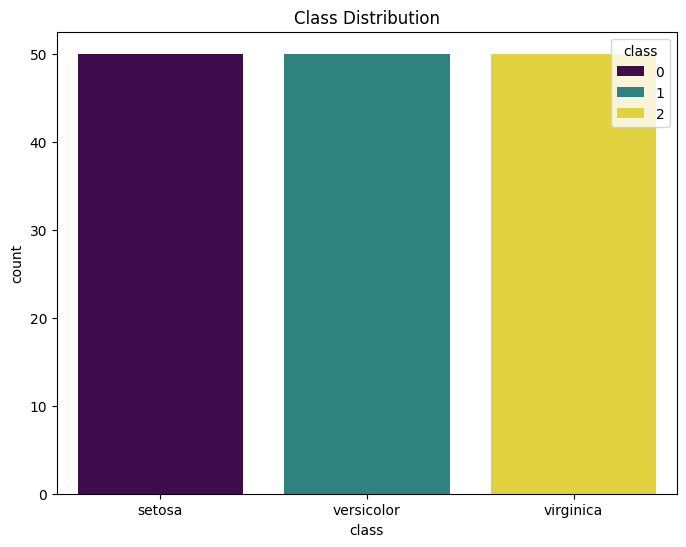

In [31]:
# 클래스별 데이터 분포 확인
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df, palette='viridis', hue='class')
plt.title("Class Distribution")
plt.xticks(ticks=[0, 1, 2], labels=class_names)
plt.show()

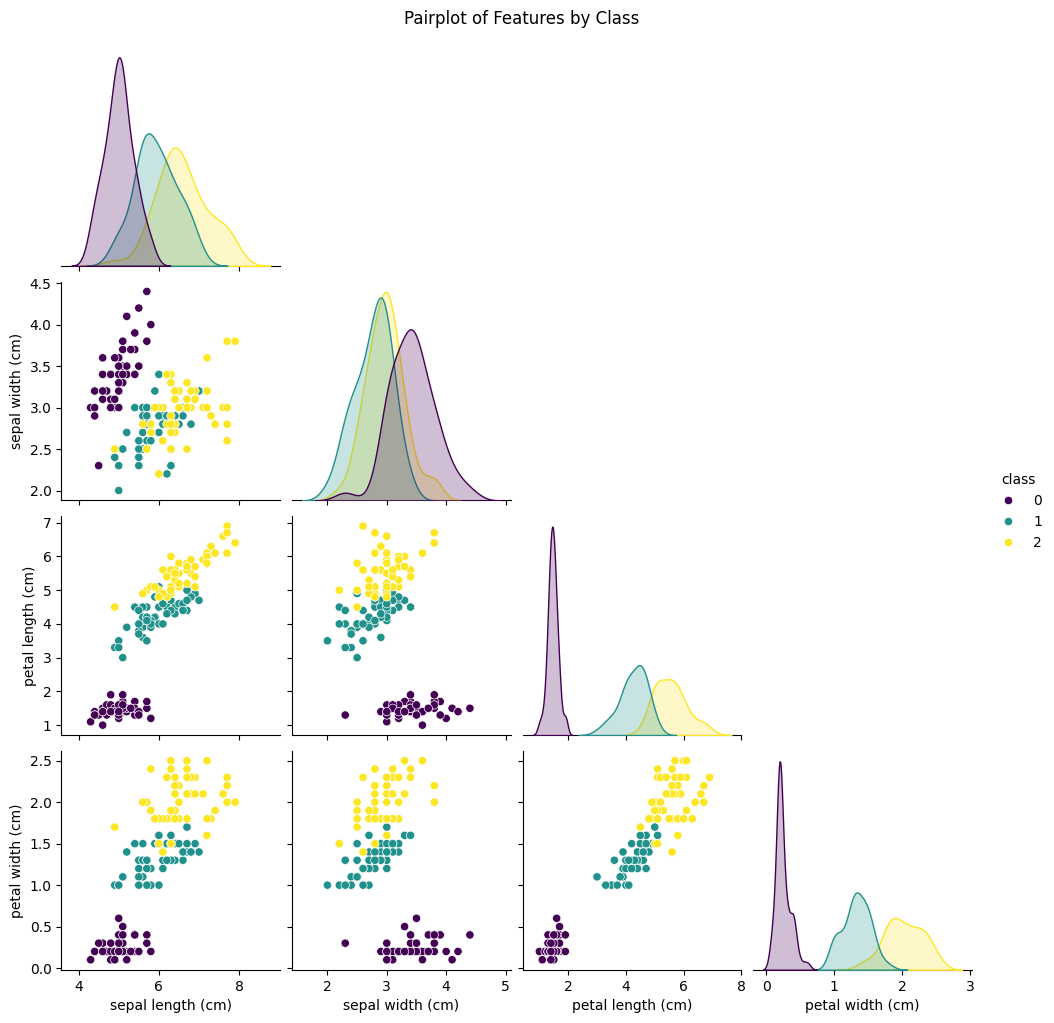

In [32]:
# 피처 간 산점도 행렬
# 분류 문제 풀 때 pairplot 유용
sns.pairplot(df, hue='class', palette='viridis', diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Features by Class", y=1.02)
plt.show()

## 2. 데이터 전처리: 데이터 분할 및 스케일링

In [33]:
# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [42]:
# Q2: stratify를 제외하면 클래스 비율이 어떻게 달라질까요? 확인해 보세요.
# stratify: train/test 분할 시 각 클래스의 비율을 그대로 유지해주는 옵션.
# 계층 별로 나눠서 분할한다는 뜻. stratify사용하지 않으면 완전 랜덤 분할이 됨. 따라서 클래스 분포가 균동하지 않음
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

unique, counts = np.unique(y_train, return_counts=True)
train_distribution = dict(zip(unique, counts))
print("Train class distribution (without stratify):", train_distribution)

Train class distribution (without stratify): {np.int64(0): np.int64(40), np.int64(1): np.int64(41), np.int64(2): np.int64(39)}


In [43]:
# 스케일링(표준화)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Q3: 스케일링을 하지 않고 학습하면 정확도에 어떤 영향을 미칠까요?
# svm은 거리와 내적(선형)과 거리를 통해 경계를 만들기 때문에 스케일링을 하지 않으면 분류의 정확도가 급락함.

## 3. 모델 적합 (SVM)

In [48]:
model = SVC(kernel='linear', C=0.1)  # 선형 커널 사용
model.fit(X_train, y_train)  # 모델 학습

SVC(C=0.1, kernel='linear')

In [49]:
# Q4: C 값을 조정해보세요 (예: 0.1, 10). 모델의 성능에 어떤 영향을 미칠까요?
# C=0.1 -> 규제가 강함, 마진을 넓게 설정함. 일부 오분류 허용. 모델이 단순, 과적합 위험 줄고 과소적합 가능성 높아짐
# C=10 -> 규제가 약함, 오분류 거의 허용 하지 않음. 모델이 복잡, 과적합 위험성이 커짐.
model = SVC(kernel='linear', C=10)  # 선형 커널 사용
model.fit(X_train, y_train)  # 모델 학습

SVC(C=10, kernel='linear')

In [ ]:
# 테스트 데이터로 예측
y_pred = model.predict(X_test)

## 4. 모델 평가 Evaluation

In [50]:
# 모델 평가
# accuracy 는 전체 예측 중에서 맞게 분류한 비율을 의미함. (정확히 맞춘 샘플 수)/(전체 샘플 수)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



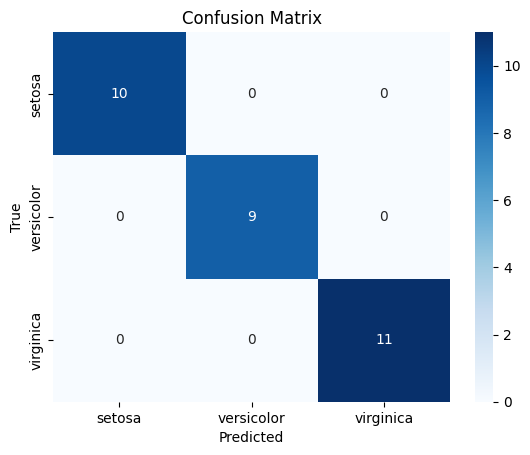

In [51]:
# Confusion Matrix 시각화
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Q6: Confusion Matrix를 보고 결과를 해석해보세요.
# 전체 샘플 수 30개, 각 샘플 10개/9개/11개 중 다른 클래스로 잘못 분류된 경우 없이 정확히 분류하였음.
# 특정 클래스에 편향 없이 모든 클래스를 동일하게 완벽 분류